In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/NLP/GK/data/IMDB_Dataset/IMDB Dataset.csv")
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Data Analysis**

In [ ]:
data.dtypes

review       object
sentiment    object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

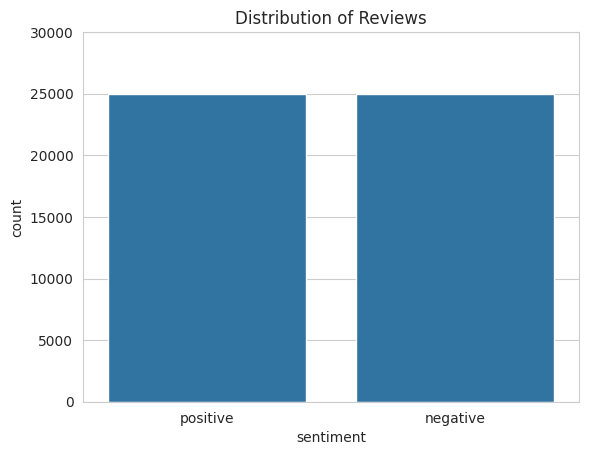

In [ ]:

sns.set_style("whitegrid")
sns.countplot(data=data, x='sentiment')
plt.ylim(0, data['sentiment'].value_counts().max() + 5000)
plt.title("Distribution of Reviews")
plt.show()

**Data Preprocessing**

In [ ]:
# Mapping sentiment values to numerical values
df={'positive':1,'negative':0}
data['sentiment']=data['sentiment'].map(df)
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [ ]:
# Making sentiments in lower case
data['review']=data['review'].str.lower()
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,i am a catholic taught in parochial elementary...,0
49998,i'm going to have to disagree with the previou...,0


In [ ]:
# Removing HTML tags
from bs4 import BeautifulSoup

def remove_html_tags(data):
    soup = BeautifulSoup(data, 'html.parser')
    cleaned_data = soup.get_text()
    return cleaned_data
data['cleaned_review'] = data['review'].apply(lambda x: remove_html_tags(x))

data.head()

<ipython-input-12-b23dc902d629>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(data, 'html.parser')


,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is...",1,"petter mattei's ""love in the time of money"" is..."


In [ ]:
# Removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: cleaning_URLs(x))
data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is...",1,"petter mattei's ""love in the time of money"" is..."


In [ ]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: cleaning_punctuations(x))
data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically theres a family where a little boy j...
4,"petter mattei's ""love in the time of money"" is...",1,petter matteis love in the time of money is a ...


In [ ]:
# Removing Special Characters
def remove_special_characters(data):
    data = re.sub(r'[^\w\s]', ' ', data)
    return data
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: remove_special_characters(x))

data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically theres a family where a little boy j...
4,"petter mattei's ""love in the time of money"" is...",1,petter matteis love in the time of money is a ...


In [ ]:
# Removing Numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: cleaning_numbers(x))
data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically theres a family where a little boy j...
4,"petter mattei's ""love in the time of money"" is...",1,petter matteis love in the time of money is a ...


In [ ]:
# Removing Repeating characters from review
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: cleaning_repeating_char(x))
data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically theres a family where a little boy j...
4,"petter mattei's ""love in the time of money"" is...",1,petter matteis love in the time of money is a ...


In [ ]:
# Remove stopword
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS=set(stopwords.words('english'))
def clean_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['cleaned_review']=data['cleaned_review'].apply(lambda x: clean_stopwords(x))
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode yo...
1,a wonderful little production. <br /><br />the...,1,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,0,basically theres family little boy jake thinks...
4,"petter mattei's ""love in the time of money"" is...",1,petter matteis love time money visually stunni...


In [ ]:
# Getting tokenization of Cleaned Review
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\s+', gaps = True)
data['cleaned_review'] = data['cleaned_review'].apply(tokenizer.tokenize)
data

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,"[one, reviewers, mentioned, watching, oz, epis..."
1,a wonderful little production. <br /><br />the...,1,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there's a family where a little boy ...,0,"[basically, theres, family, little, boy, jake,..."
4,"petter mattei's ""love in the time of money"" is...",1,"[petter, matteis, love, time, money, visually,..."
...,...,...,...
49995,i thought this movie did a down right good job...,1,"[thought, movie, right, good, job, wasnt, crea..."
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,i am a catholic taught in parochial elementary...,0,"[catholic, taught, parochial, elementary, scho..."
49998,i'm going to have to disagree with the previou...,0,"[im, going, disagree, previous, comment, side,..."


In [ ]:
# Applying Stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: stemming_on_text(x))
data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,"[one, review, mention, watch, oz, episod, youl..."
1,a wonderful little production. <br /><br />the...,1,"[wonder, littl, product, film, techniqu, unass..."
2,i thought this was a wonderful way to spend ti...,1,"[thought, wonder, way, spend, time, hot, summe..."
3,basically there's a family where a little boy ...,0,"[basic, there, famili, littl, boy, jake, think..."
4,"petter mattei's ""love in the time of money"" is...",1,"[petter, mattei, love, time, money, visual, st..."


(-0.5, 1599.5, 799.5, -0.5)

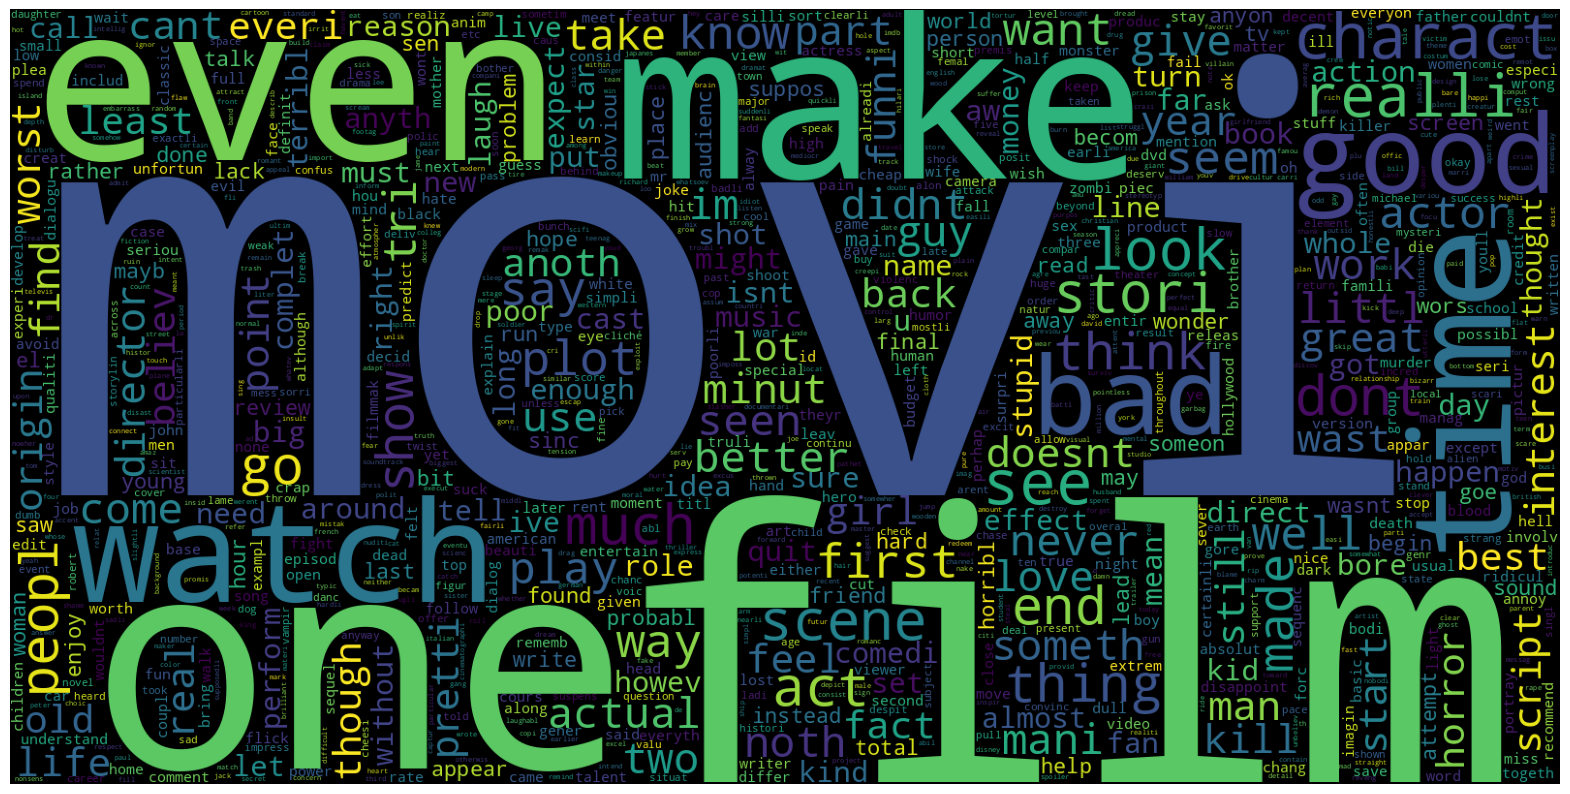

In [ ]:
# Plot a cloud of words for negative tweets
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data_neg = data[data['sentiment']==0]['cleaned_review'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

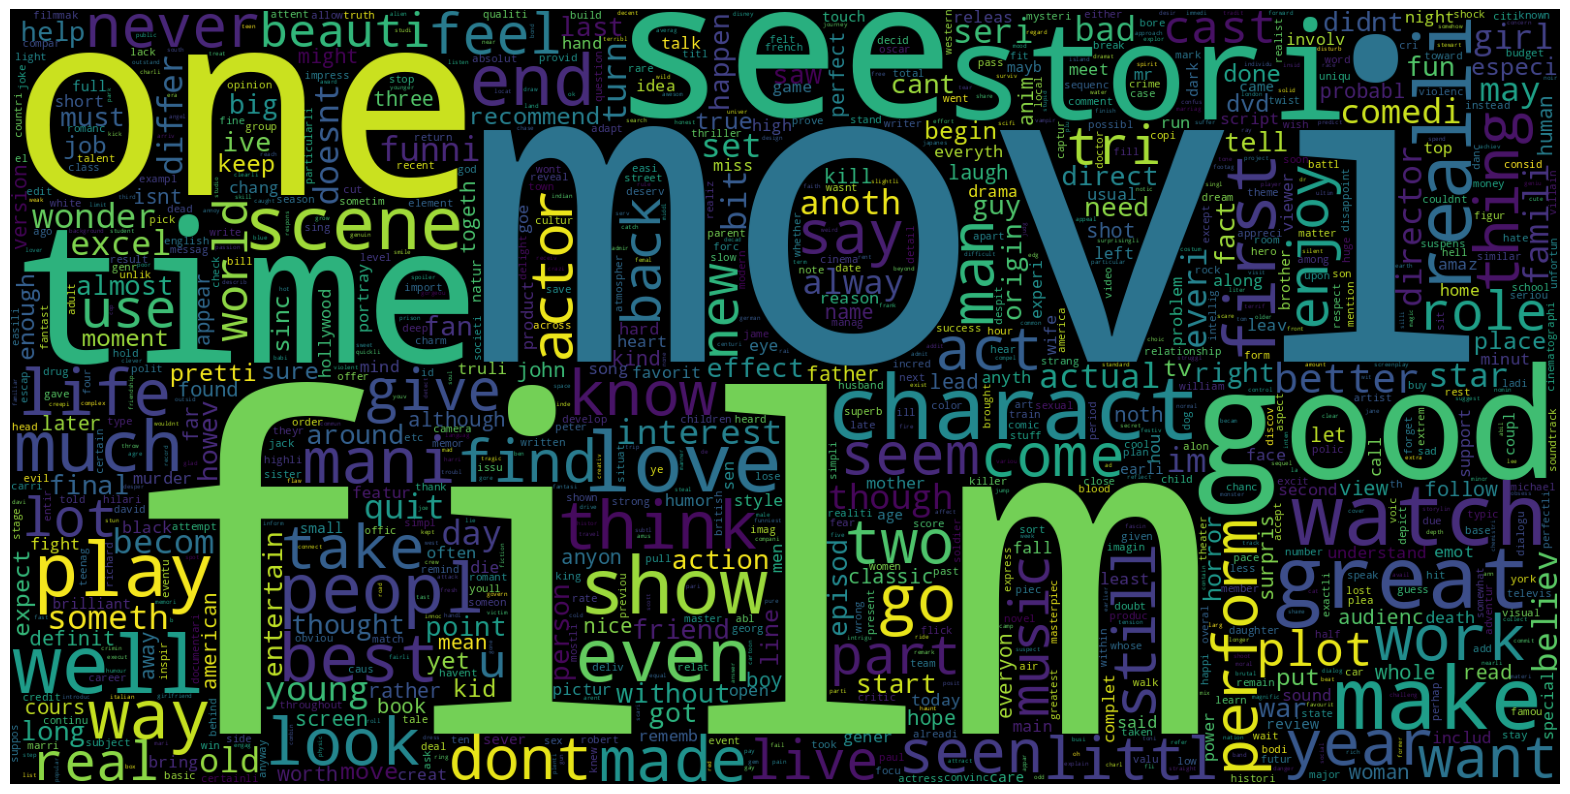

In [ ]:
# Plot a cloud of words for positive tweets
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data_neg = data[data['sentiment']==1]['cleaned_review'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

In [ ]:
data['text'] = data['cleaned_review'].apply(lambda x: ' '.join(x) )
data.head()

,review,sentiment,cleaned_review,text
0,one of the other reviewers has mentioned that ...,1,"[one, review, mention, watch, oz, episod, youl...",one review mention watch oz episod youll hook ...
1,a wonderful little production. <br /><br />the...,1,"[wonder, littl, product, film, techniqu, unass...",wonder littl product film techniqu unassum old...
2,i thought this was a wonderful way to spend ti...,1,"[thought, wonder, way, spend, time, hot, summe...",thought wonder way spend time hot summer weeke...
3,basically there's a family where a little boy ...,0,"[basic, there, famili, littl, boy, jake, think...",basic there famili littl boy jake think there ...
4,"petter mattei's ""love in the time of money"" is...",1,"[petter, mattei, love, time, money, visual, st...",petter mattei love time money visual stun film...


In [ ]:
X=data.text
y=data.sentiment

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(50000,)
(40000,)
(10000,)


In [ ]:
# Transforming Dataset using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  5000


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(40000, 5000)
(10000, 5000)


**Classification Models**

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

SVM Model

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef
test_acc_svm=accuracy_score(y_test,svm_pred)
print(test_acc_svm)

accuracy = accuracy_score(y_test,svm_pred)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y_test,svm_pred)
print(f"F1 Score: {f1}")

recall = recall_score(y_test,svm_pred)
print(f"Recall: {recall}")

precision = precision_score(y_test,svm_pred)
print(f"Precision: {precision}")

auc = roc_auc_score(y_test,svm_pred)
print(f"AUC: {auc}")

kappa = cohen_kappa_score(y_test,svm_pred)
print(f"Kappa: {kappa}")

mcc = matthews_corrcoef(y_test,svm_pred)
print(f"MCC: {mcc}")

0.8869
Accuracy: 0.8869
F1 Score: 0.8872045477211529
Recall: 0.8958710976837865
Precision: 0.8787040695377322
AUC: 0.8869623611556966
Kappa: 0.7738196324559028
MCC: 0.7739652656604907


Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_pred = naive_bayes.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
test_acc_nb=accuracy_score(y_test,naive_bayes_pred)
print(test_acc_nb)

accuracy = accuracy_score(y_test,naive_bayes_pred)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y_test,naive_bayes_pred)
print(f"F1 Score: {f1}")

recall = recall_score(y_test,naive_bayes_pred)
print(f"Recall: {recall}")

precision = precision_score(y_test,naive_bayes_pred)
print(f"Precision: {precision}")

auc = roc_auc_score(y_test,naive_bayes_pred)
print(f"AUC: {auc}")

kappa = cohen_kappa_score(y_test,naive_bayes_pred)
print(f"Kappa: {kappa}")

mcc = matthews_corrcoef(y_test,naive_bayes_pred)
print(f"MCC: {mcc}")

0.85
Accuracy: 0.85
F1 Score: 0.8509538950715421
Recall: 0.8624370594159114
Precision: 0.83977250441263
AUC: 0.8500864542362576
Kappa: 0.7000415742378107
MCC: 0.7002930389242148


Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)
test_acc_lr = accuracy_score(y_test, logistic_reg_pred)
print(test_acc_lr)

accuracy = accuracy_score(y_test,logistic_reg_pred)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y_test,logistic_reg_pred)
print(f"F1 Score: {f1}")

recall = recall_score(y_test,logistic_reg_pred)
print(f"Recall: {recall}")

precision = precision_score(y_test,logistic_reg_pred)
print(f"Precision: {precision}")

auc = roc_auc_score(y_test,logistic_reg_pred)
print(f"AUC: {auc}")

kappa = cohen_kappa_score(y_test,logistic_reg_pred)
print(f"Kappa: {kappa}")

mcc = matthews_corrcoef(y_test,logistic_reg_pred)
print(f"MCC: {mcc}")

0.8839
Accuracy: 0.8839
F1 Score: 0.8839348195541337
Recall: 0.8904330312185297
Precision: 0.8775307661770544
AUC: 0.8839454133252531
Kappa: 0.7678123523828533
MCC: 0.7678941901992391


**Confusion Matrix of Models**

Text(0.5, 1.0, 'Confusion Matrix SVM')

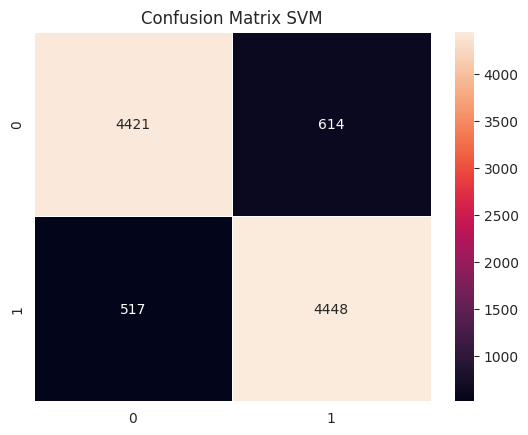

In [ ]:
cfm=confusion_matrix(y_test,svm_pred)
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)
plt.title("Confusion Matrix SVM")

Text(0.5, 1.0, 'Confusion Matrix Naive Bayes')

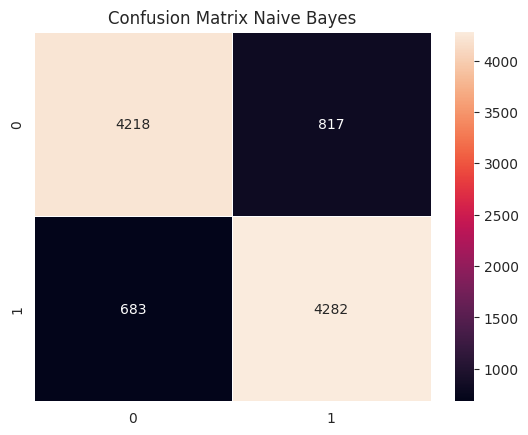

In [ ]:
cfm=confusion_matrix(y_test,naive_bayes_pred)
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)
plt.title("Confusion Matrix Naive Bayes")

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

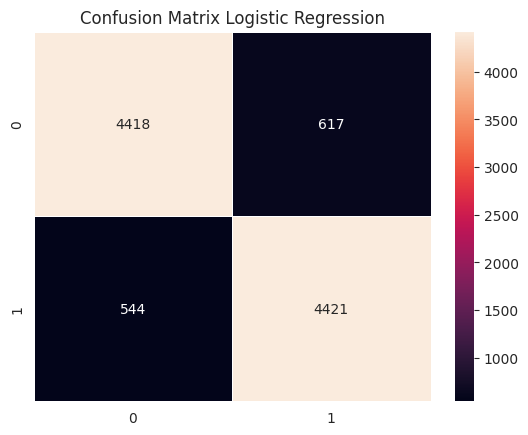

In [ ]:
cfm=confusion_matrix(y_test,logistic_reg_pred)
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)
plt.title("Confusion Matrix Logistic Regression")


**Performance Measurement of Models**


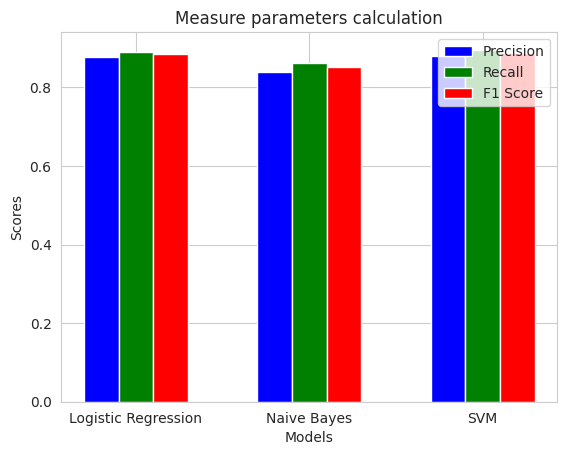

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score


precision_logistic = precision_score(y_test, logistic_reg_pred)
recall_logistic = recall_score(y_test, logistic_reg_pred)
f1_logistic = f1_score(y_test, logistic_reg_pred)

precision_naive_bayes = precision_score(y_test, naive_bayes_pred)
recall_naive_bayes = recall_score(y_test, naive_bayes_pred)
f1_naive_bayes = f1_score(y_test, naive_bayes_pred)

precision_svm = precision_score(y_test, svm_pred)
recall_svm = recall_score(y_test, svm_pred)
f1_svm = f1_score(y_test, svm_pred)


models = ['Logistic Regression', 'Naive Bayes', 'SVM']


precision_scores = [precision_logistic, precision_naive_bayes, precision_svm]
recall_scores = [recall_logistic, recall_naive_bayes, recall_svm]
f1_scores = [f1_logistic, f1_naive_bayes, f1_svm]


bar_width = 0.2


index = np.arange(len(models))


plt.bar(index, precision_scores, bar_width, label='Precision', color='b', align='center')
plt.bar(index + bar_width, recall_scores, bar_width, label='Recall', color='g', align='center')
plt.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1 Score', color='r', align='center')


plt.xlabel('Models')
plt.xticks(index + bar_width, models)


plt.ylabel('Scores')
plt.legend()


plt.title('Measure parameters calculation')
plt.show()
